In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.optimizers import Adam

### 1. 讀入 MNSIT 數據集

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 你也可以讀入 Fasion 版的 MNIST

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
n = 9487

In [ ]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[n]

1

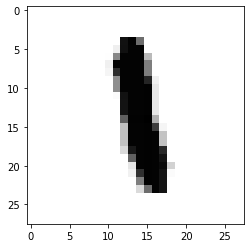

In [ ]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [ ]:
#將28*28的矩陣拉平成784維的向量
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
#one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路




In [ ]:
#打開一個標準、空白的神經網路
#model = Sequential()

In [ ]:
#加入一層神經網路, 100個神經元, 784維的輸入, 激發函數:reLU
#model.add(Dense(100, input_dim=784, activation='relu'))

In [ ]:
#model.add(Dense(100, activation='relu'))

In [ ]:
#輸出層
#model.add(Dense(10, activation='softmax'))

>#修改後
* 3層神經網路
* 隱藏層每層神經元數目改為20


In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=784, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

In [ ]:
#(Lloss_function:mse平均平方差)
"""
model.compile(loss='mse', optimizer=SGD(lr=0.087), 
              metrics=['accuracy'])
              """

"\nmodel.compile(loss='mse', optimizer=SGD(lr=0.087), \n              metrics=['accuracy'])\n              "

>#修改後
* loss function: categorical_crossentropy
* optimizer: Adam
* learning rate: 0.03

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.03), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#### 欣賞我們的作品

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_9 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
Total params: 16,750
Trainable params: 16,750
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

In [ ]:
#model.fit(x_train, y_train, batch_size=100, epochs=20)

>#修改後
* batches_size: 256
* epochs: 40

In [ ]:
model.fit(x_train, y_train, batch_size=256, epochs=40)

Epoch 1/40
235/235 [==============================] - 1s 4ms/step - loss: 0.5191 - accuracy: 0.8338
Epoch 2/40
235/235 [==============================] - 1s 4ms/step - loss: 0.2989 - accuracy: 0.9121
Epoch 3/40
235/235 [==============================] - 1s 4ms/step - loss: 0.2617 - accuracy: 0.9243
Epoch 4/40
235/235 [==============================] - 1s 4ms/step - loss: 0.2468 - accuracy: 0.9299
Epoch 5/40
235/235 [==============================] - 1s 4ms/step - loss: 0.2428 - accuracy: 0.9310
Epoch 6/40
235/235 [==============================] - 1s 4ms/step - loss: 0.2454 - accuracy: 0.9320
Epoch 7/40
235/235 [==============================] - 1s 4ms/step - loss: 0.2302 - accuracy: 0.9370
Epoch 8/40
235/235 [==============================] - 1s 4ms/step - loss: 0.2312 - accuracy: 0.9364
Epoch 9/40
235/235 [==============================] - 1s 4ms/step - loss: 0.2285 - accuracy: 0.9381
Epoch 10/40
235/235 [==============================] - 1s 4ms/step - loss: 0.2235 - accuracy: 0.9401

### 6. step 3: 預測 (testing)

In [ ]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

神經網路預測是: 6


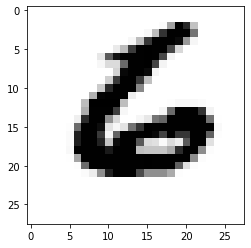

In [ ]:
n = 9999

print('神經網路預測是:', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [ ]:
model.save("my_nn.h5")